In [35]:
import numpy as np
from scipy.special import owens_t
import matplotlib.pyplot as plt
# get a logger
import logging
logger = logging.getLogger(__name__)
from ERM import fair_adversarial_error_erm
from state_evolution import OverlapSet, fair_adversarial_error_overlaps
%load_ext autoreload
%autoreload 2
from scipy.integrate import quad, dblquad

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
from data_model import KFeaturesModel
d = 1000
idx_0 = 0
idx_2 = 700
tau = 0
feature_ratios = np.array([0.5,0.5])
features_x = np.array([10,1])
features_theta = np.array([1,10])
data_model = KFeaturesModel(d, logger, delete_existing=True, normalize_matrices=True,source_pickle_path="",feature_ratios=feature_ratios,features_x=features_x,features_theta=features_theta)
# data_model.Sigma_x = data_model.Sigma_x / np.trace(data_model.Sigma_x) * d
spec_Sigma_x = np.linalg.eigvals(data_model.Sigma_x)
data_model.rho = np.mean(spec_Sigma_x * data_model.theta**2) 
data_set = data_model.generate_data(100000,tau)

In [38]:
def noise_contribution(rho: float, tau: float) -> float:
    if tau == 0:
        tau = 1e-10
    return 0.5 - np.arctan( np.sqrt( rho / tau**2 ) ) / np.pi

In [39]:
# now create noisy labels to compare ourselves to
def noisy_labels(data_set, tau):
    labels = data_set.y
    noise = np.random.normal(0, 1, labels.shape) * tau
    activations = data_set.X @ data_model.theta / np.sqrt(d)
    noisy_labels = np.sign(activations + noise)
    return noisy_labels

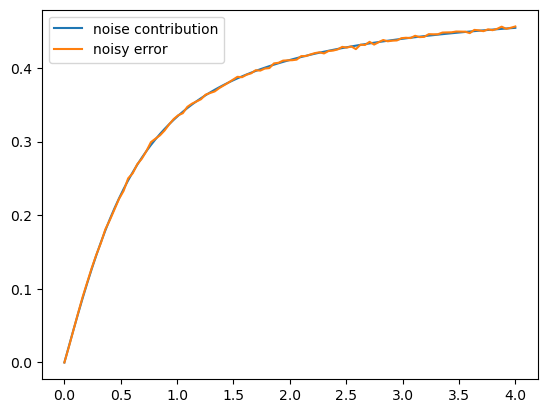

In [40]:
taus = np.linspace(0, 4, 100)
noise_contributions = np.array([noise_contribution(data_model.rho, tau) for tau in taus])
noisy_error = np.array([np.mean(noisy_labels(data_set, tau) != data_set.y) for tau in taus])

plt.plot(taus, noise_contributions, label="noise contribution")
plt.plot(taus, noisy_error, label="noisy error")
plt.legend()
plt.show()

Thetas

In [57]:
thetas = np.random.default_rng().multivariate_normal(np.zeros(d), data_model.Sigma_theta, 1, method="cholesky")[0]  

In [58]:
thetas.shape

(1000,)

In [56]:
thetas[0]

array([-1.41471627e-01, -1.39459402e-01,  4.69555525e-02,  5.97825869e-02,
        5.16524143e-02, -6.08334933e-02,  1.54658792e-01, -3.28014868e-01,
        1.40562787e-01,  3.54450864e-01, -8.32915776e-02, -3.90113975e-03,
       -4.66298296e-02,  1.02934581e-01, -1.01742966e-01, -9.78287253e-02,
        2.10657078e-01, -1.92096076e-01, -8.26503175e-02,  1.71037318e-01,
       -6.69361867e-02,  1.46515812e-01, -4.53943902e-01, -9.53065272e-02,
       -2.31282705e-01,  1.57935718e-01,  1.64648886e-01,  2.12040589e-01,
       -7.12696196e-02, -4.99606551e-02,  1.10571675e-01,  1.34880881e-02,
        1.61522694e-01, -1.43134884e-01,  5.54211323e-02, -1.27303257e-02,
       -4.34212316e-02, -1.43065224e-01,  1.14152759e-01, -2.57665561e-01,
       -8.25558564e-02, -4.75630227e-02, -2.11296022e-01,  9.23695435e-02,
       -3.36196544e-01,  1.47405135e-01,  1.87588067e-01, -9.27610330e-02,
        1.08929434e-01, -5.58243522e-02,  8.98572155e-02, -6.41987322e-02,
        2.59026545e-02, -

In [51]:
# compute the average sum of the thetas
avg_sum = np.mean(np.sum(thetas, axis=1))
avg_sum

0.4877661112807049

In [52]:
data_model.theta

array([0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181818,
       0.18181818, 0.18181818, 0.18181818, 0.18181818, 0.18181

In [53]:
np.sum(data_model.theta)

999.9999999999997